In [1]:
# 第一批
# ! featurize dataset download 94d0bc00-f708-4206-8a34-78a4a29386c7
# 第二批
# ! featurize dataset download 5d43ecc8-d7cd-40c3-a234-c353f3018ca7

### prepare

In [2]:
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
from TJL.data import *
from TJL.utils import *
from TJL.loss import *
from TJL.model import UNet_2DE
from TJL.train import Trainer
import os


In [3]:
img_path, mask_path = "./data/raw/raw_sub_1/slice/", "./data/raw/raw_sub_1/mask/"
img_list, mask_list = [os.path.join(img_path,f) for f in os.listdir(img_path)], [os.path.join(mask_path,f) for f in os.listdir(mask_path)]
img_list.sort()
mask_list.sort()
train_set = MyDataset(img_list[:-20],mask_list[:-20],(256,256))
val_set = MyDataset(img_list[-20:],mask_list[-20:],(256,256))


# img_path, mask_path = "./data/raw/raw_sub_1/slice/", "./data/raw/raw_sub_1/slice/"
# img_list, mask_list = [os.path.join(img_path,f) for f in os.listdir(img_path)][-200:], [os.path.join(mask_path,f) for f in os.listdir(mask_path)][-200:]
# img_list.sort()
# mask_list.sort()
# test_set = MyDataset(img_list,mask_list,use_clahe=True)


train_loader = DataLoader(train_set,4)
val_loader = DataLoader(val_set,1)
# test_loader = DataLoader(test_set,1)

img,mask,edge = next(iter(train_loader))
# imshow([img[0,0].numpy(),mask[0,0].numpy()])
img.shape,mask.shape,edge.shape




(torch.Size([4, 1, 256, 256]),
 torch.Size([4, 1, 256, 256]),
 torch.Size([4, 1, 256, 256]))

### Train

In [4]:
class Edge_Trainer(Trainer):
    def __init__(self, model, optim, loss_func, save_path, device, scheduler=None):
        super().__init__(model, optim, loss_func, save_path, device, scheduler)
    def train_one_epoch(self, train_loader):
        self.model.train()
        loss_list = []
        for imgs,label,edge in tqdm(train_loader):
            imgs = imgs.to(self.device)
            label = label.to(self.device)
            edge = edge.to(self.device)

            pred,pred_edge = self.model(imgs)
            loss = self.loss_func(pred,pred_edge,label,edge)

            self.optim.zero_grad()
            loss.backward()
            self.optim.step()
            loss_list.append(loss.item())
        return np.mean(loss_list)

    def val_one_epoch(self,val_loader):
        self.model.eval()
        loss_list = []
        for imgs,label,edge in tqdm(val_loader):
            imgs = imgs.to(self.device)
            label = label.to(self.device)
            edge = edge.to(self.device)

            pred,pred_edge = self.model(imgs)
            loss = self.loss_func(pred,pred_edge,label,edge)
            loss_list.append(loss.item())
        return np.mean(loss_list)


In [5]:
device = torch.device("cuda:0"if torch.cuda.is_available()else"cpu")
model = UNet_2DE(in_ch=1)
optim = torch.optim.Adam(model.parameters(),lr=3e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim,T_max=50)
loss_function = BCELoss()
trainer = Edge_Trainer(model,optim,loss_function,"./model/RAW/",device,scheduler=scheduler)
trainer.train(train_loader,val_loader,100,10)

100%|██████████| 20/20 [00:03<00:00,  5.42it/s]


1/100	10/10	train_loss:0.9177200178305308	val_loss:1.0541340678930282	model saved


100%|██████████| 20/20 [00:03<00:00,  5.33it/s]


2/100	9/10	train_loss:0.6753016650676728	val_loss:0.764796151034534	model saved


100%|██████████| 20/20 [00:03<00:00,  5.51it/s]


3/100	9/10	train_loss:0.6481781582037608	val_loss:1.1712439566850663


100%|██████████| 20/20 [00:03<00:00,  5.18it/s]


4/100	8/10	train_loss:0.6319227854410807	val_loss:0.9159576454665512


100%|██████████| 20/20 [00:03<00:00,  5.10it/s]


5/100	7/10	train_loss:0.7443429271380106	val_loss:0.9441660135053098


100%|██████████| 20/20 [00:04<00:00,  4.88it/s]


6/100	6/10	train_loss:0.5762099881966909	val_loss:0.7770471787196584


100%|██████████| 20/20 [00:03<00:00,  5.51it/s]


7/100	5/10	train_loss:0.5846095740795135	val_loss:0.9137303421273828


100%|██████████| 20/20 [00:03<00:00,  5.43it/s]


8/100	4/10	train_loss:0.6292014320691427	val_loss:0.790741608873941


100%|██████████| 20/20 [00:03<00:00,  5.28it/s]


9/100	3/10	train_loss:0.5387562274932861	val_loss:0.6178968021646142	model saved


100%|██████████| 20/20 [00:03<00:00,  5.29it/s]


10/100	9/10	train_loss:0.513624620437622	val_loss:0.6914919160772115


100%|██████████| 20/20 [00:03<00:00,  5.34it/s]


11/100	8/10	train_loss:0.6013577421506245	val_loss:1.145069375867024


100%|██████████| 20/20 [00:03<00:00,  5.56it/s]


12/100	7/10	train_loss:0.5715109487374623	val_loss:1.0357007507234812


100%|██████████| 20/20 [00:03<00:00,  5.10it/s]


13/100	6/10	train_loss:0.49539912343025205	val_loss:1.4969319845549762


100%|██████████| 20/20 [00:03<00:00,  5.39it/s]


14/100	5/10	train_loss:0.5225000321865082	val_loss:0.8718119464349001


100%|██████████| 20/20 [00:03<00:00,  5.27it/s]


15/100	4/10	train_loss:0.4543524225552877	val_loss:1.3014969987561926


100%|██████████| 20/20 [00:03<00:00,  5.40it/s]


16/100	3/10	train_loss:0.48872212767601014	val_loss:0.5651485103473533	model saved


100%|██████████| 20/20 [00:03<00:00,  5.55it/s]


17/100	9/10	train_loss:0.44094377954800923	val_loss:0.6028869282337836


100%|██████████| 20/20 [00:03<00:00,  5.24it/s]


18/100	8/10	train_loss:0.4988762338956197	val_loss:1.1381686157925288


100%|██████████| 20/20 [00:03<00:00,  5.45it/s]


19/100	7/10	train_loss:0.4945744792620341	val_loss:0.5247827371757012	model saved


100%|██████████| 20/20 [00:03<00:00,  5.43it/s]


20/100	9/10	train_loss:0.4016163647174835	val_loss:0.5004208998288959	model saved


100%|██████████| 20/20 [00:03<00:00,  5.41it/s]


21/100	9/10	train_loss:0.4709138502677282	val_loss:0.6029787164588924


100%|██████████| 20/20 [00:03<00:00,  5.35it/s]


22/100	8/10	train_loss:0.46680425604184467	val_loss:0.3627060590079054	model saved


100%|██████████| 20/20 [00:03<00:00,  5.40it/s]


23/100	9/10	train_loss:0.4272552827994029	val_loss:0.7170271099545061


100%|██████████| 20/20 [00:03<00:00,  5.39it/s]


24/100	8/10	train_loss:0.49238973259925845	val_loss:0.4259505301473837


100%|██████████| 20/20 [00:03<00:00,  5.46it/s]


25/100	7/10	train_loss:0.43517097234725954	val_loss:0.466555587912444


100%|██████████| 20/20 [00:03<00:00,  5.35it/s]


26/100	6/10	train_loss:0.43190911213556926	val_loss:0.3390052900649607	model saved


100%|██████████| 20/20 [00:03<00:00,  5.42it/s]


27/100	9/10	train_loss:0.4033709516127904	val_loss:0.5533261755394051


100%|██████████| 20/20 [00:03<00:00,  5.44it/s]


28/100	8/10	train_loss:0.4015755891799927	val_loss:0.6203500875039026


100%|██████████| 20/20 [00:03<00:00,  5.36it/s]


29/100	7/10	train_loss:0.3743820826212565	val_loss:0.5491692669864279


100%|██████████| 20/20 [00:03<00:00,  5.09it/s]


30/100	6/10	train_loss:0.44871341784795127	val_loss:0.8620097212027759


100%|██████████| 20/20 [00:03<00:00,  5.30it/s]


31/100	5/10	train_loss:0.3587495048840841	val_loss:0.5403020823607221


100%|██████████| 20/20 [00:03<00:00,  5.39it/s]


32/100	4/10	train_loss:0.4327241450548172	val_loss:0.6772263569582719


100%|██████████| 20/20 [00:03<00:00,  5.42it/s]


33/100	3/10	train_loss:0.441852538784345	val_loss:0.528885112896387


100%|██████████| 20/20 [00:03<00:00,  5.28it/s]


34/100	2/10	train_loss:0.377035782734553	val_loss:0.671259083939367


100%|██████████| 20/20 [00:03<00:00,  5.39it/s]

35/100	1/10	train_loss:0.4226667483647664	val_loss:0.4681132890516892


### Val

In [6]:
model_path = "./model/RAW/model.pth"

In [7]:
# 评价指标
device = torch.device("cuda:0"if torch.cuda.is_available()else"cpu")
model = torch.load(model_path,map_location=device)
model.eval()
pre_list = []
acc_list = []
iou_list = []
dice_list = []
recall_list = []
iou_min = np.inf
iou_min_bach = None
iou_min_index = None
index = 0

thread = 0.5
for imgs,label,edge in tqdm(val_loader):
    imgs = imgs.to(device)
    label = label.to(device)

    pred,pred_edge = model(imgs)

    pred[pred>thread]=1
    pred[pred<1]=0
    pre_list.append(get_pre(pred.cpu(),label.cpu()))
    acc_list.append(get_acc(pred.cpu(),label.cpu()))
    iou_list.append(get_miou(pred.cpu(),label.cpu()))
    dice_list.append(get_dice(pred.cpu(),label.cpu()))
    recall_list.append(get_recall(pred.cpu(),label.cpu()))

    miou = get_miou(pred.cpu(),label.cpu())
    if miou<iou_min:
        iou_min = miou
        iou_min_bach = (imgs,label,pred)
        iou_min_index = index
    index+=1

pre,acc,iou,dice,recall = np.mean(pre_list),np.mean(acc_list),np.mean(iou_list),np.mean(dice_list),np.mean(recall_list)
print(f"test_set:\tpre:{pre:.3f}\tacc:{acc:.3f}\tdice:{dice:.3f}\tiou:{iou:.3f}\trecall:{recall:.3f}")

100%|██████████| 20/20 [00:04<00:00,  4.59it/s]

test_set:	pre:0.556	acc:0.887	dice:0.615	iou:0.670	recall:0.727


  0%|          | 0/20 [00:00<?, ?it/s]

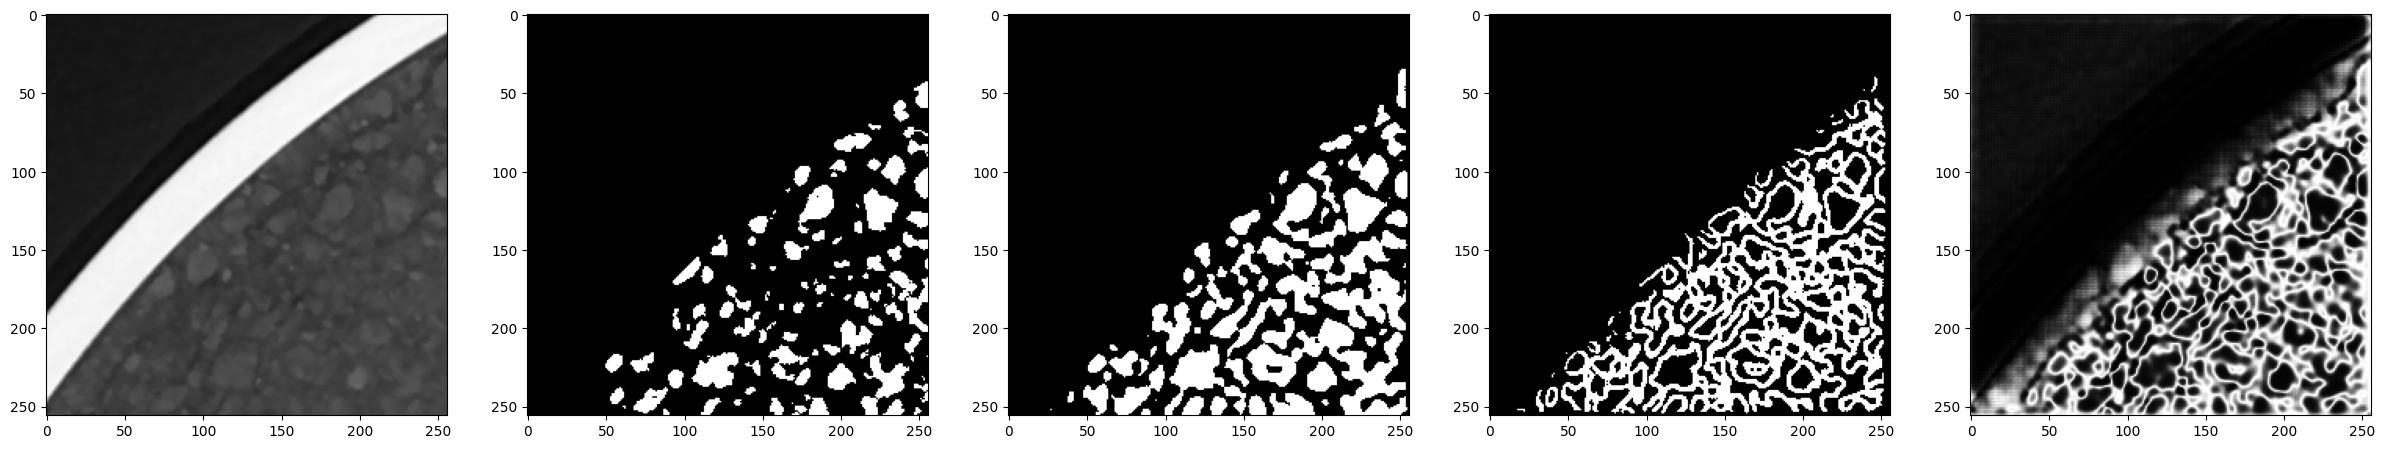

  0%|          | 0/20 [00:00<?, ?it/s]


In [11]:
from skimage.io import imsave
from tqdm import tqdm

# device = torch.device("cpu")
model = torch.load(model_path,map_location=device)
model.eval()


thread=0.5
thread_edge=0.5
for i in tqdm(range(len(val_set))):
    img, label, edge = val_set.__getitem__(0)
    img, label, edge = img[:,:256,:256], label[:,:256,:256], edge[:,:256,:256]

    img, label = img.unsqueeze(0).to(device), label.unsqueeze(0).to(device)
    pred,pred_edge = model(img)
    pred = pred.detach().cpu().numpy()
    pred_edge = pred_edge.detach().cpu().numpy()

    entropy = min_max_norm(-pred*np.log2(pred))
    pred[pred>thread]=1
    pred[pred<1]=0
    pred_edge[pred_edge>thread_edge]=1
    pred_edge[pred_edge<1]=0

    img = img.detach().cpu().numpy()[0,0]
    label = label.detach().cpu().numpy()[0,0]
    edge = edge.detach().cpu().numpy()[0]
    pred = pred[0,0]
    pred_edge = pred_edge[0,0]
    entropy = entropy[0,0]
    # imshow([img,label,pred,np.abs(pred-label)])
    # imshow([img,edge,pred_edge,np.abs(pred_edge-edge)])
    # imshow([img,label,pred,pred*(1-pred_edge)])


    imshow([img,label,pred,pred_edge,entropy])
    # imshow([img,label,pred,pred_edge,pred*(1-pred_edge)],save_path=f"./result/{i}.png",show=False)
    break




In [9]:
# from skimage.io import imsave
# from tqdm import tqdm

# device = torch.device("cpu")
# model = torch.load(model_path,map_location=device)
# model.eval()


# thread=0.1
# thread_edge=0.5
# for i in tqdm(range(len(test_set))):
#     img, label, edge = test_set.__getitem__(i)
#     img, label, edge = img[:,:1024,:1024], label[:,:1024,:1024], edge[:,:1024,:1024]

#     img, label = img.unsqueeze(0).to(device), label.unsqueeze(0).to(device)
#     pred,pred_edge = model(img)
#     break

# imshow([(pred*(1-pred))[0][0].detach().cpu().numpy()])
# imshow([(pred_edge*(1-pred_edge))[0][0].detach().cpu().numpy()])
